# Machine Learning Exercise 2 

In [1]:
#importing libraries

import numpy as np
import sklearn as sk
import pandas as pd

In [2]:
#loading and reading dataset 

Link = "E:\\university\science and research\machine learning\تمرین دوم\data.csv"

Data = pd.read_csv(Link)

L = Data.iloc[:,1]
L = list(L)
L = np.asarray(L)

X = Data.iloc[:,2:32]
X = X.values 

## A: Using KNN & Dividing dataset to the training and testing sets

In [13]:
### Dividing Dataset to the training and testing sets 
from sklearn.model_selection import train_test_split
X_train_knn_A, X_test_knn_A, L_train_knn_A, L_test_knn_A = train_test_split(X,L,test_size=0.3)

### Standardization on training and testing sets 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_knn_A = sc.fit_transform(X_train_knn_A)
X_test_knn_A = sc.transform(X_test_knn_A)

### Loading an KNN Model 
from sklearn.neighbors import KNeighborsClassifier
Model = KNeighborsClassifier(n_neighbors=3) 

### Training the model 
Model.fit(X_train_knn_A,L_train_knn_A)

### Predicting the testing samples 
Pre = Model.predict(X_test_knn_A)
Score = Model.score(X_test_knn_A,L_test_knn_A)
Loss_knn_A = 1 - Score


### Evaluating the Model 
print(" the Accuracy for KNN model training with 0.7 of dataset is:",Score)
print (" the Loss for KNN model training with 0.7 of dataset is:",Loss_knn_A)


 the Accuracy for KNN model training with 0.7 of dataset is: 0.9473684210526315
 the Loss for KNN model training with 0.7 of dataset is: 0.052631578947368474


## B: Using KNN & K-fold

In [14]:
### Loading and training K-fold Model 

from sklearn.model_selection import KFold 

kf = KFold(n_splits=10)
kf.get_n_splits(X,L)

#Model = KNeighborsClassifier(n_neighbors=3) 

ACC_Whole_knn_B = [] 

for train_index_knn_B, test_index_knn_B in kf.split(X,L):
    X_train_knn_B = X[train_index_knn_B,:]
    L_train_knn_B = L[train_index_knn_B]
    X_test_knn_B = X[test_index_knn_B,:]
    L_test_knn_B = L[test_index_knn_B]
    X_train_knn_B = sc.fit_transform(X_train_knn_B)
    X_test_knn_B = sc.transform(X_test_knn_B)
    Model.fit(X_train_knn_B,L_train_knn_B)
    ACC = Model.score(X_test_knn_B,L_test_knn_B)
    ACC_Whole_knn_B.append(ACC)


ACC_Whole_array_knn_B = np.asarray(ACC_Whole_knn_B)
Mean_ACC_knn_B = np.mean(ACC_Whole_array_knn_B) 
Loss_knn_B = [1 - i for i in ACC_Whole_array_knn_B]
Mean_Loss_knn_B = np.mean(Loss_knn_B) 

print ("Accuracy for all folds are:" ,ACC_Whole_knn_B)
print ("Loss for all folds are:" ,Loss_knn_B)
print (" The average of Accuracies is:" ,Mean_ACC_knn_B)
print(" The average of Loss is:" ,Mean_Loss_knn_B)


Accuracy for all folds are: [0.9649122807017544, 0.9473684210526315, 0.9824561403508771, 0.9649122807017544, 0.9473684210526315, 0.9649122807017544, 0.9824561403508771, 0.9824561403508771, 0.9824561403508771, 0.9464285714285714]
Loss for all folds are: [0.03508771929824561, 0.052631578947368474, 0.01754385964912286, 0.03508771929824561, 0.052631578947368474, 0.03508771929824561, 0.01754385964912286, 0.01754385964912286, 0.01754385964912286, 0.0535714285714286]
 The average of Accuracies is: 0.9665726817042606
 The average of Loss is: 0.03342731829573938


## C: using SVM & Dividing dataset to the training and testing sets

### firt solution:

In [15]:
#using SVM & Dividing dataset to the training and testing sets

### Dividing Dataset to the training and testing sets 
X_train_SVM_A, X_test_SVM_A, L_train_SVM_A, L_test_SVM_A = train_test_split(X,L,test_size=0.3)

### Standardization on training and testing sets 
#sc = StandardScaler()
X_train_SVM_A = sc.fit_transform(X_train_SVM_A)
X_test_SVM_A = sc.transform(X_test_SVM_A)

### Loading and training SVM Models
from sklearn.svm import SVC 
Model_SVM = SVC()
Model_SVM.fit(X_train_SVM_A,L_train_SVM_A)
ACC = Model_SVM.score(X_test_SVM_A,L_test_SVM_A)

### Predicting and Evaluating the testing samples 
Pre_SVM_A = Model_SVM.predict(X_test_SVM_A)
Score_SVM_A = Model_SVM.score(X_test_SVM_A,L_test_SVM_A)
Loss_SVM_A = 1 - Score_SVM_A

print ("Accuracy of SVM model (SVC) training 0.7 of dataset is:" ,Score_SVM_A)
print ("Loss of SVM model (SVC) training 0.7 of dataset is:" ,Loss_SVM_A)


Accuracy of SVM model (SVC) training 0.7 of dataset is: 0.9766081871345029
Loss of SVM model (SVC) training 0.7 of dataset is: 0.023391812865497075


## D: Using SVM & K-fold

### firt solution:

In [16]:
### K-fold Model 

kf = KFold(n_splits=10)
kf.get_n_splits(X,L)

#sc = StandardScaler()
#Model_SVM = SVC()

ACC_Whole_SVM_B = [] 

for train_index_SVM_B, test_index_SVM_B in kf.split(X,L):
    X_train_SVM_B = X[train_index_SVM_B,:]
    L_train_SVM_B = L[train_index_SVM_B]
    X_test_SVM_B = X[test_index_SVM_B,:]
    L_test_SVM_B = L[test_index_SVM_B]
    X_train_SVM_B = sc.fit_transform(X_train_SVM_B)
    X_test_SVM_B = sc.transform(X_test_SVM_B)
    Model_SVM.fit(X_train_SVM_B,L_train_SVM_B)
    ACC = Model_SVM.score(X_test_SVM_B,L_test_SVM_B)
    ACC_Whole_SVM_B.append(ACC)


ACC_Whole_array_SVM_B = np.asarray(ACC_Whole_SVM_B)
Mean_ACC_SVM_B = np.mean(ACC_Whole_array_SVM_B) 
Loss_SVM_B = [1 - i for i in ACC_Whole_array_SVM_B]
Mean_Loss_SVM_B = np.mean(Loss_SVM_B) 

print ("Accuracy for all folds training with SVC are:" ,ACC_Whole_SVM_B)
print ("Loss for all folds training with SVC are:" ,Loss_SVM_B)
print (" The average of Accuracy for SVC model is:" ,Mean_ACC_SVM_B)
print(" The average of Loss for SVC model is:" ,Mean_Loss_SVM_B)

Accuracy for all folds training with SVC are: [0.9824561403508771, 0.9473684210526315, 0.9473684210526315, 1.0, 0.9649122807017544, 0.9824561403508771, 1.0, 0.9824561403508771, 1.0, 0.9642857142857143]
Loss for all folds training with SVC are: [0.01754385964912286, 0.052631578947368474, 0.052631578947368474, 0.0, 0.03508771929824561, 0.01754385964912286, 0.0, 0.01754385964912286, 0.0, 0.0357142857142857]
 The average of Accuracy for SVC model is: 0.9771303258145363
 The average of Loss for SVC model is: 0.022869674185463686


## Summarizing the results

 The Accuracy for part A is: 0.9473684210526315
 The Accuracy for part B is: 0.9665726817042606
 The Accuracy for part C is: 0.9766081871345029
 The Accuracy for part D is: 0.9771303258145363


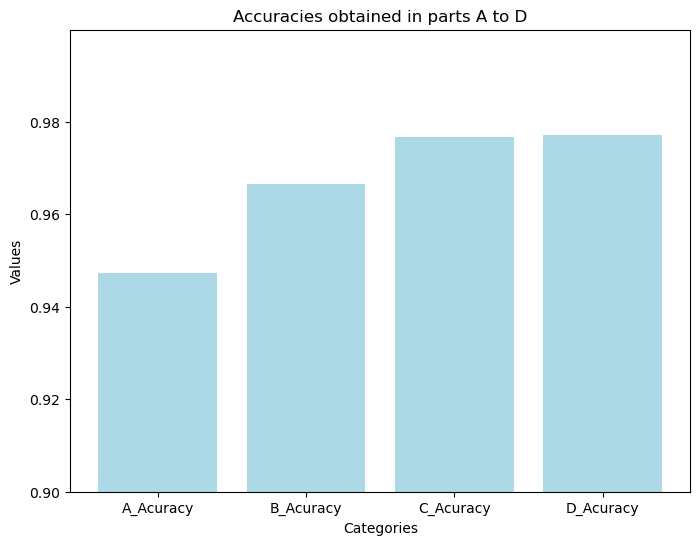

In [17]:

print(" The Accuracy for part A is:" ,Score)
print(" The Accuracy for part B is:" ,Mean_ACC_knn_B)
print(" The Accuracy for part C is:" ,Score_SVM_A)
print(" The Accuracy for part D is:", Mean_ACC_SVM_B)




import matplotlib.pyplot as plt

# dictionary
data = {'A_Acuracy': Score, 'B_Acuracy': Mean_ACC_knn_B, 'C_Acuracy': Score_SVM_A, 'D_Acuracy': Mean_ACC_SVM_B}

# Bar chart
plt.figure(figsize=(8, 6))
plt.bar(data.keys(), data.values(), color='lightblue')
plt.ylim(0.9000, 0.9999)
plt.xlabel('Categories')
plt.ylabel('Values')
plt.title('Accuracies obtained in parts A to D')
plt.show()

### second solution-C:

In [18]:
#using SVM & Dividing dataset to the training and testing sets

### Dividing Dataset to the training and testing sets 
X_train_SVM_A_2, X_test_SVM_A_2, L_train_SVM_A_2, L_test_SVM_A_2 = train_test_split(X,L,test_size=0.3)

### Standardization on training and testing sets 
X_train_SVM_A_2 = sc.fit_transform(X_train_SVM_A_2)
X_test_SVM_A_2 = sc.transform(X_test_SVM_A_2)

### Loading SVM Models
from sklearn.svm import SVC 
LIN_SVM_Model_A_2 = SVC(kernel='linear')
RBF_SVM_Model_A_2 = SVC(kernel='rbf')
POL_SVM_Model_A_2 = SVC(kernel='poly',degree=2)

### Training the Models 
LIN_SVM_Model_A_2.fit(X_train_SVM_A_2,L_train_SVM_A_2)
RBF_SVM_Model_A_2.fit(X_train_SVM_A_2,L_train_SVM_A_2)
POL_SVM_Model_A_2.fit(X_train_SVM_A_2,L_train_SVM_A_2)

### Predicting the testing samples 
Pre_LIN_SVM_A_2 = LIN_SVM_Model_A_2.predict(X_test_SVM_A_2)
Pre_RBF_SVM_A_2 = RBF_SVM_Model_A_2.predict(X_test_SVM_A_2)
Pre_POL_SVM_A_2 = POL_SVM_Model_A_2.predict(X_test_SVM_A_2)

### Evaluating the trained models 
SC_LIN_SVM_A_2 = LIN_SVM_Model_A_2.score(X_test_SVM_A_2,L_test_SVM_A_2)
SC_RBF_SVM_A_2 = RBF_SVM_Model_A_2.score(X_test_SVM_A_2,L_test_SVM_A_2)
SC_POL_SVM_A_2 = POL_SVM_Model_A_2.score(X_test_SVM_A_2,L_test_SVM_A_2)

print ("Accuracy of SVC model using Linear kernel is:" ,SC_LIN_SVM_A_2)
print ("Accuracy of SVC model using RBF kernel is:" ,SC_RBF_SVM_A_2)
print ("Accuracy of SVC model using Polynomial kernel is:" ,SC_POL_SVM_A_2)

Loss_LIN_SVM_A_2 = 1 - SC_LIN_SVM_A_2
Loss_RBF_SVM_A_2 = 1 - SC_RBF_SVM_A_2
Loss_POL_SVM_A_2 = 1 - SC_POL_SVM_A_2

print ("Loss of SVC model using Linear kernel is:" ,Loss_LIN_SVM_A_2)
print ("Loss of SVC model using RBF kernel is:" ,Loss_RBF_SVM_A_2)
print ("Loss of SVC model using Polynomial kernel is:" ,Loss_POL_SVM_A_2)

Accuracy of SVC model using Linear kernel is: 0.9766081871345029
Accuracy of SVC model using RBF kernel is: 0.9707602339181286
Accuracy of SVC model using Polynomial kernel is: 0.783625730994152
Loss of SVC model using Linear kernel is: 0.023391812865497075
Loss of SVC model using RBF kernel is: 0.0292397660818714
Loss of SVC model using Polynomial kernel is: 0.216374269005848


### second solution-D:

In [19]:
kf = KFold(n_splits=10)
kf.get_n_splits(X,L)

# Define kernels to use
kernels = ['linear', 'rbf', 'poly']
results = {}

for kernel in kernels:
    print(f"\nTraining with {kernel} kernel:")
    
    # Initialize the SVM model with the current kernel
    model_SVM = SVC(kernel=kernel)
    
    # Initialize lists to store accuracy and loss for each fold
    ACC_Whole_SVM_B_2 = []
    Loss_SVM_B_2 = []
    
    # Perform K-Fold Cross-Validation
    for train_index_SVM_B_2, test_index_SVM_B_2 in kf.split(X,L):
        X_train_SVM_B_2 = X[train_index_SVM_B_2,:]
        L_train_SVM_B_2 = L[train_index_SVM_B_2]
        X_test_SVM_B_2 = X[test_index_SVM_B_2,:]
        L_test_SVM_B_2 = L[test_index_SVM_B_2]
        X_train_SVM_B_2 = sc.fit_transform(X_train_SVM_B_2)
        X_test_SVM_B_2 = sc.transform(X_test_SVM_B_2)
        Model_SVM.fit(X_train_SVM_B_2,L_train_SVM_B_2)
        ACC = Model_SVM.score(X_test_SVM_B_2,L_test_SVM_B_2)
        ACC_Whole_SVM_B_2.append(ACC)
    
    # Calculate mean accuracy and mean loss for the current kernel
    Mean_ACC_SVM_B_2 = np.mean(ACC_Whole_SVM_B_2)
    Mean_Loss_SVM_B_2 = 1 - Mean_ACC_SVM_B_2
    
    # Store the results in a dictionary for each kernel
    results[kernel] = {
        "Accuracy per fold": ACC_Whole_SVM_B_2,
        "Loss per fold": Loss_SVM_B_2,
        "Mean Accuracy": Mean_ACC_SVM_B_2,
        "Mean Loss": Mean_Loss_SVM_B_2
    }
    
    # Print results for each kernel
    print("Accuracy for all folds:", ACC_Whole_SVM_B_2)
    print("Loss for all folds:", Loss_SVM_B_2)
    print("Mean Accuracy:", Mean_ACC_SVM_B_2)
    print("Mean Loss:", Mean_Loss_SVM_B_2)



Training with linear kernel:
Accuracy for all folds: [0.9824561403508771, 0.9473684210526315, 0.9473684210526315, 1.0, 0.9649122807017544, 0.9824561403508771, 1.0, 0.9824561403508771, 1.0, 0.9642857142857143]
Loss for all folds: []
Mean Accuracy: 0.9771303258145363
Mean Loss: 0.022869674185463706

Training with rbf kernel:
Accuracy for all folds: [0.9824561403508771, 0.9473684210526315, 0.9473684210526315, 1.0, 0.9649122807017544, 0.9824561403508771, 1.0, 0.9824561403508771, 1.0, 0.9642857142857143]
Loss for all folds: []
Mean Accuracy: 0.9771303258145363
Mean Loss: 0.022869674185463706

Training with poly kernel:
Accuracy for all folds: [0.9824561403508771, 0.9473684210526315, 0.9473684210526315, 1.0, 0.9649122807017544, 0.9824561403508771, 1.0, 0.9824561403508771, 1.0, 0.9642857142857143]
Loss for all folds: []
Mean Accuracy: 0.9771303258145363
Mean Loss: 0.022869674185463706
